Maze solved! Path:
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 4)
(2, 4)
(3, 4)
(4, 4)


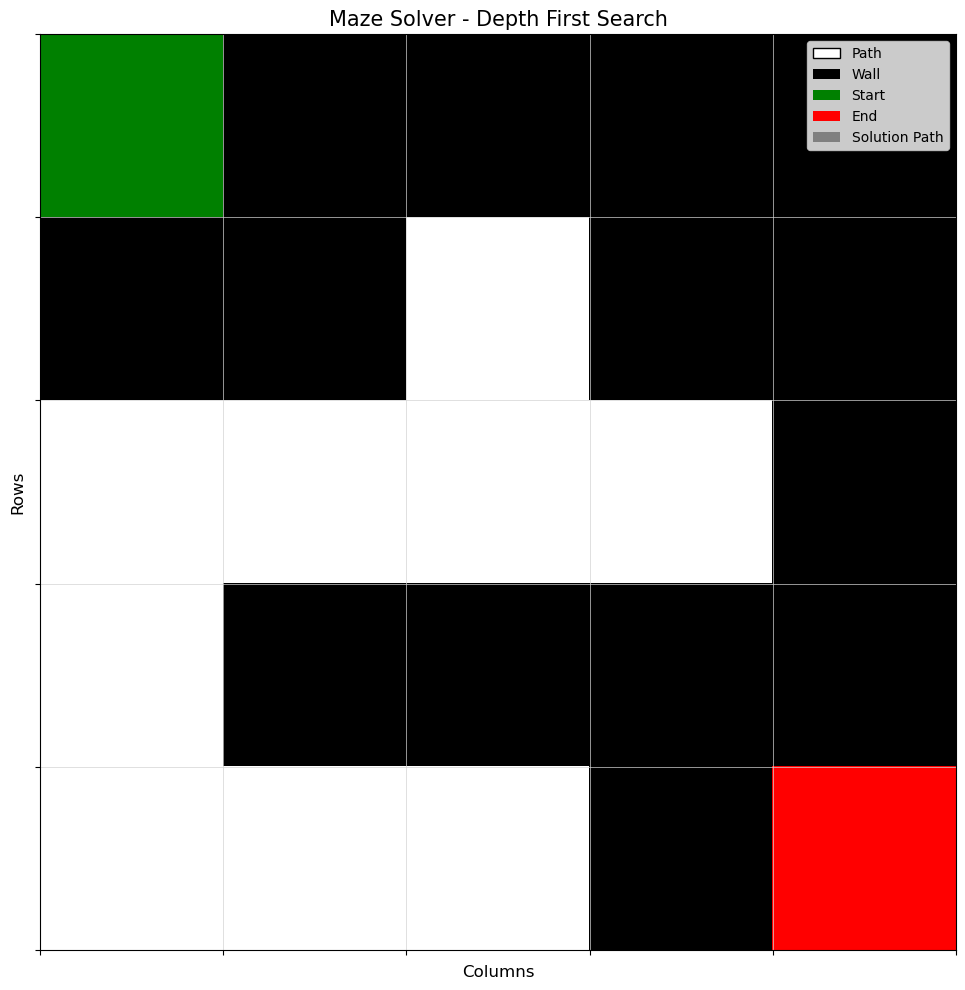

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class MazeSolver:
    def __init__(self, maze):
        """
        Initialize the maze solver with a 2D maze
        
        :param maze: 2D list representing the maze
                     0 represents path, 1 represents wall
                     Start is top-left, End is bottom-right
        """
        self.maze = maze
        self.rows = len(maze)
        self.cols = len(maze[0])
        self.visited = [[False for _ in range(self.cols)] for _ in range(self.rows)]
        self.path = []

    def is_valid_move(self, x, y):
        """
        Check if the move is valid
        
        :param x: x-coordinate
        :param y: y-coordinate
        :return: Boolean indicating if move is valid
        """
        return (0 <= x < self.rows and 
                0 <= y < self.cols and 
                self.maze[x][y] == 0 and 
                not self.visited[x][y])

    def solve_maze(self):
        """
        Solve the maze using Depth-First Search
        
        :return: List of coordinates representing the path or None if no path exists
        """
        # Reset visited and path
        self.visited = [[False for _ in range(self.cols)] for _ in range(self.rows)]
        self.path = []

        # Try to solve maze starting from top-left corner
        if self._dfs(0, 0):
            return self.path
        return None

    def _dfs(self, x, y):
        """
        Recursive Depth-First Search implementation
        
        :param x: current x-coordinate
        :param y: current y-coordinate
        :return: Boolean indicating if path to end is found
        """
        # Check if current position is the end
        if x == self.rows - 1 and y == self.cols - 1:
            self.path.append((x, y))
            return True

        # Mark current cell as visited
        self.visited[x][y] = True
        self.path.append((x, y))

        # Possible moves: right, down, left, up
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

        for dx, dy in directions:
            next_x, next_y = x + dx, y + dy

            # Check if next move is valid
            if self.is_valid_move(next_x, next_y):
                # Recursively explore the path
                if self._dfs(next_x, next_y):
                    return True

        # Backtrack: remove current position if no path found
        self.path.pop()
        return False

    def visualize_maze(self):
        """
        Visualize the maze and solution path using Matplotlib
        """
        # Create a custom colormap
        cmap = mcolors.ListedColormap(['white', 'black', 'green', 'red'])
        bounds = [0, 1, 2, 3, 4]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Create a copy of the maze for visualization
        viz_maze = np.array(self.maze, dtype=float)

        # Mark start and end points
        viz_maze[0, 0] = 2  # Start point in green
        viz_maze[-1, -1] = 3  # End point in red

        # Mark the solution path
        if self.path:
            for x, y in self.path:
                if (x, y) != (0, 0) and (x, y) != (self.rows-1, self.cols-1):
                    viz_maze[x, y] = 1.5  # Path in a slightly different color

        # Create the plot
        plt.figure(figsize=(10, 10))
        plt.imshow(viz_maze, cmap=cmap, norm=norm, interpolation='nearest')

        # Add grid lines
        plt.grid(which='major', color='lightgray', linestyle='-', linewidth=0.5)
        plt.xticks(np.arange(-0.5, self.cols, 1), [])
        plt.yticks(np.arange(-0.5, self.rows, 1), [])

        # Customize the plot
        plt.title('Maze Solver - Depth First Search', fontsize=15)
        plt.xlabel('Columns', fontsize=12)
        plt.ylabel('Rows', fontsize=12)

        # Add a legend
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='white', edgecolor='black', label='Path'),
            Patch(facecolor='black', label='Wall'),
            Patch(facecolor='green', label='Start'),
            Patch(facecolor='red', label='End'),
            Patch(facecolor='gray', label='Solution Path')
        ]
        plt.legend(handles=legend_elements, loc='best')

        plt.tight_layout()
        plt.show()

# Example usage
def main():
    # Example maze (0 = path, 1 = wall)
    maze = [
        [0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0]
    ]

    # Create maze solver
    solver = MazeSolver(maze)

    # Solve the maze
    solution = solver.solve_maze()

    # Visualize the maze and solution
    if solution:
        print("Maze solved! Path:")
        for step in solution:
            print(step)
        solver.visualize_maze()
    else:
        print("No path found.")

# Run the example
if __name__ == "__main__":
    main()